In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

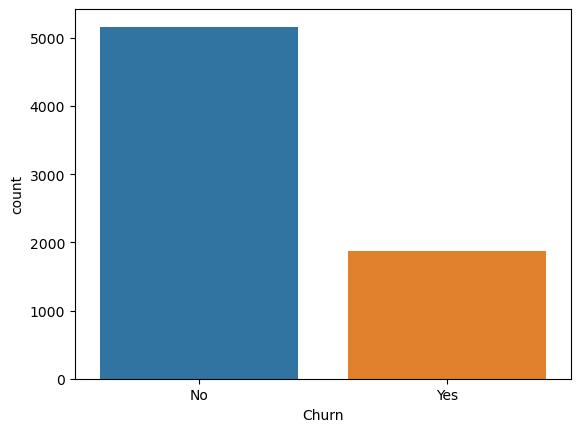

In [9]:
sns.countplot(data=df, x="Churn")

<Axes: xlabel='Churn', ylabel='TotalCharges'>

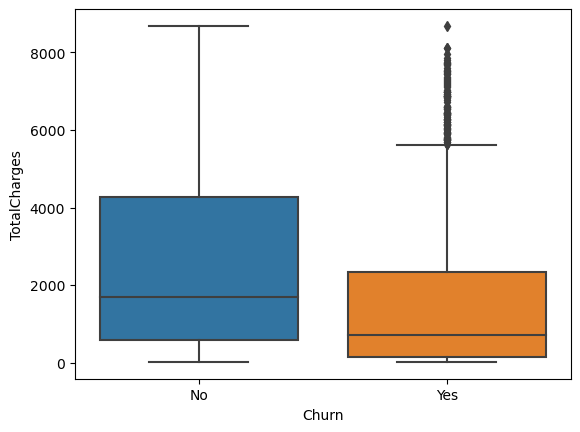

In [12]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")

<Axes: xlabel='Churn', ylabel='TotalCharges'>

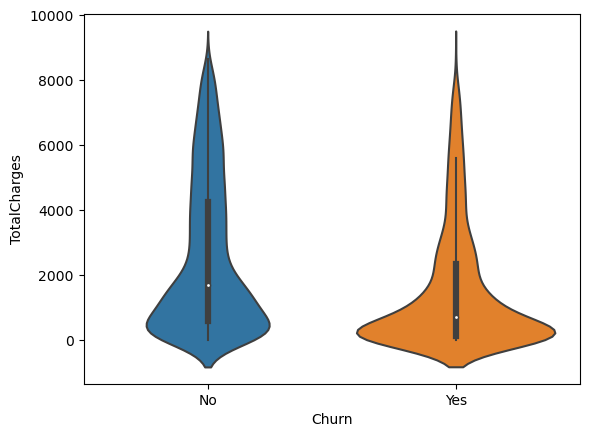

In [10]:
sns.violinplot(data=df, x="Churn", y="TotalCharges")

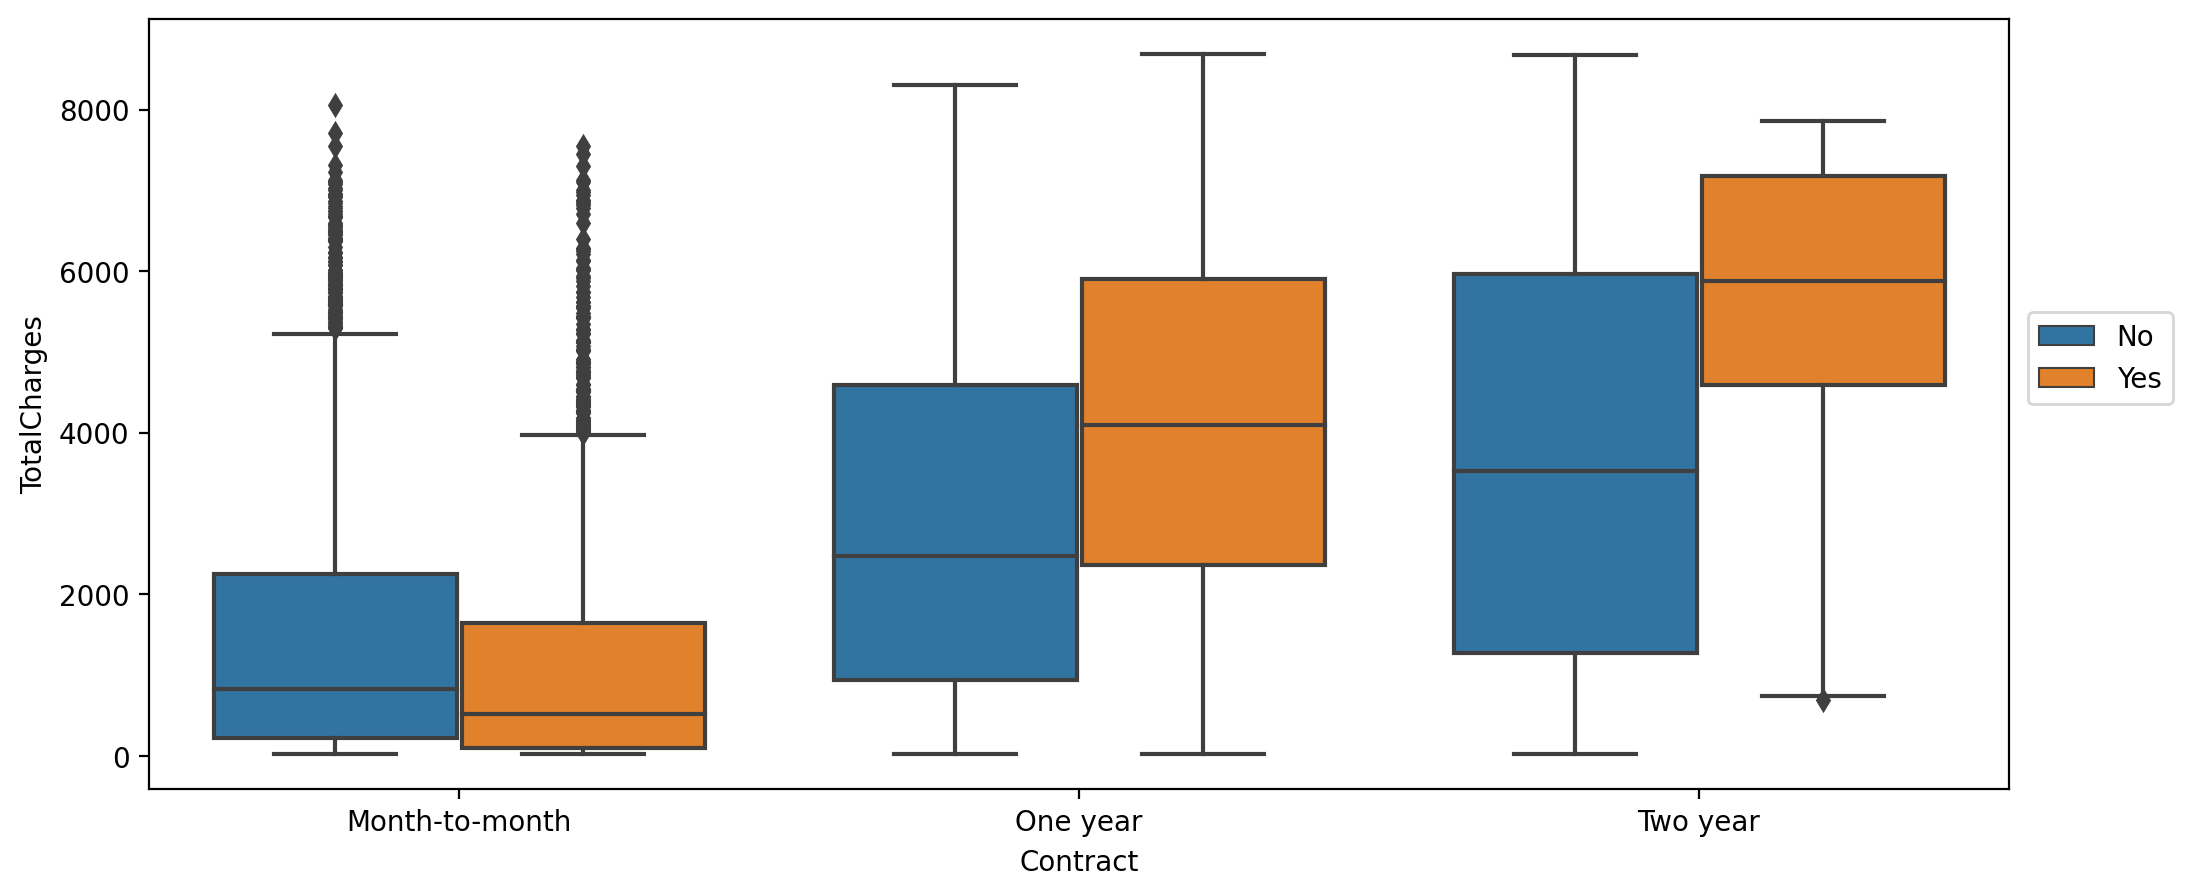

In [11]:
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")
plt.legend(loc=(1.01, 0.5))

In [12]:
df_corr = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [13]:
df_corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
df_corr = pd.get_dummies(df_corr.drop(["customerID","Churn"], axis=1)) * 1

In [15]:
df_corr["Churn"] = df["Churn"]

In [16]:
df_corr["Churn"] = df_corr["Churn"].map({"No": 0, "Yes": 1})

In [17]:
df_corr.corr()["Churn"].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
OnlineBackup_No internet service          -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
StreamingMovies_No internet service       -0.227578
DeviceProtection_No internet service      -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

<Axes: >

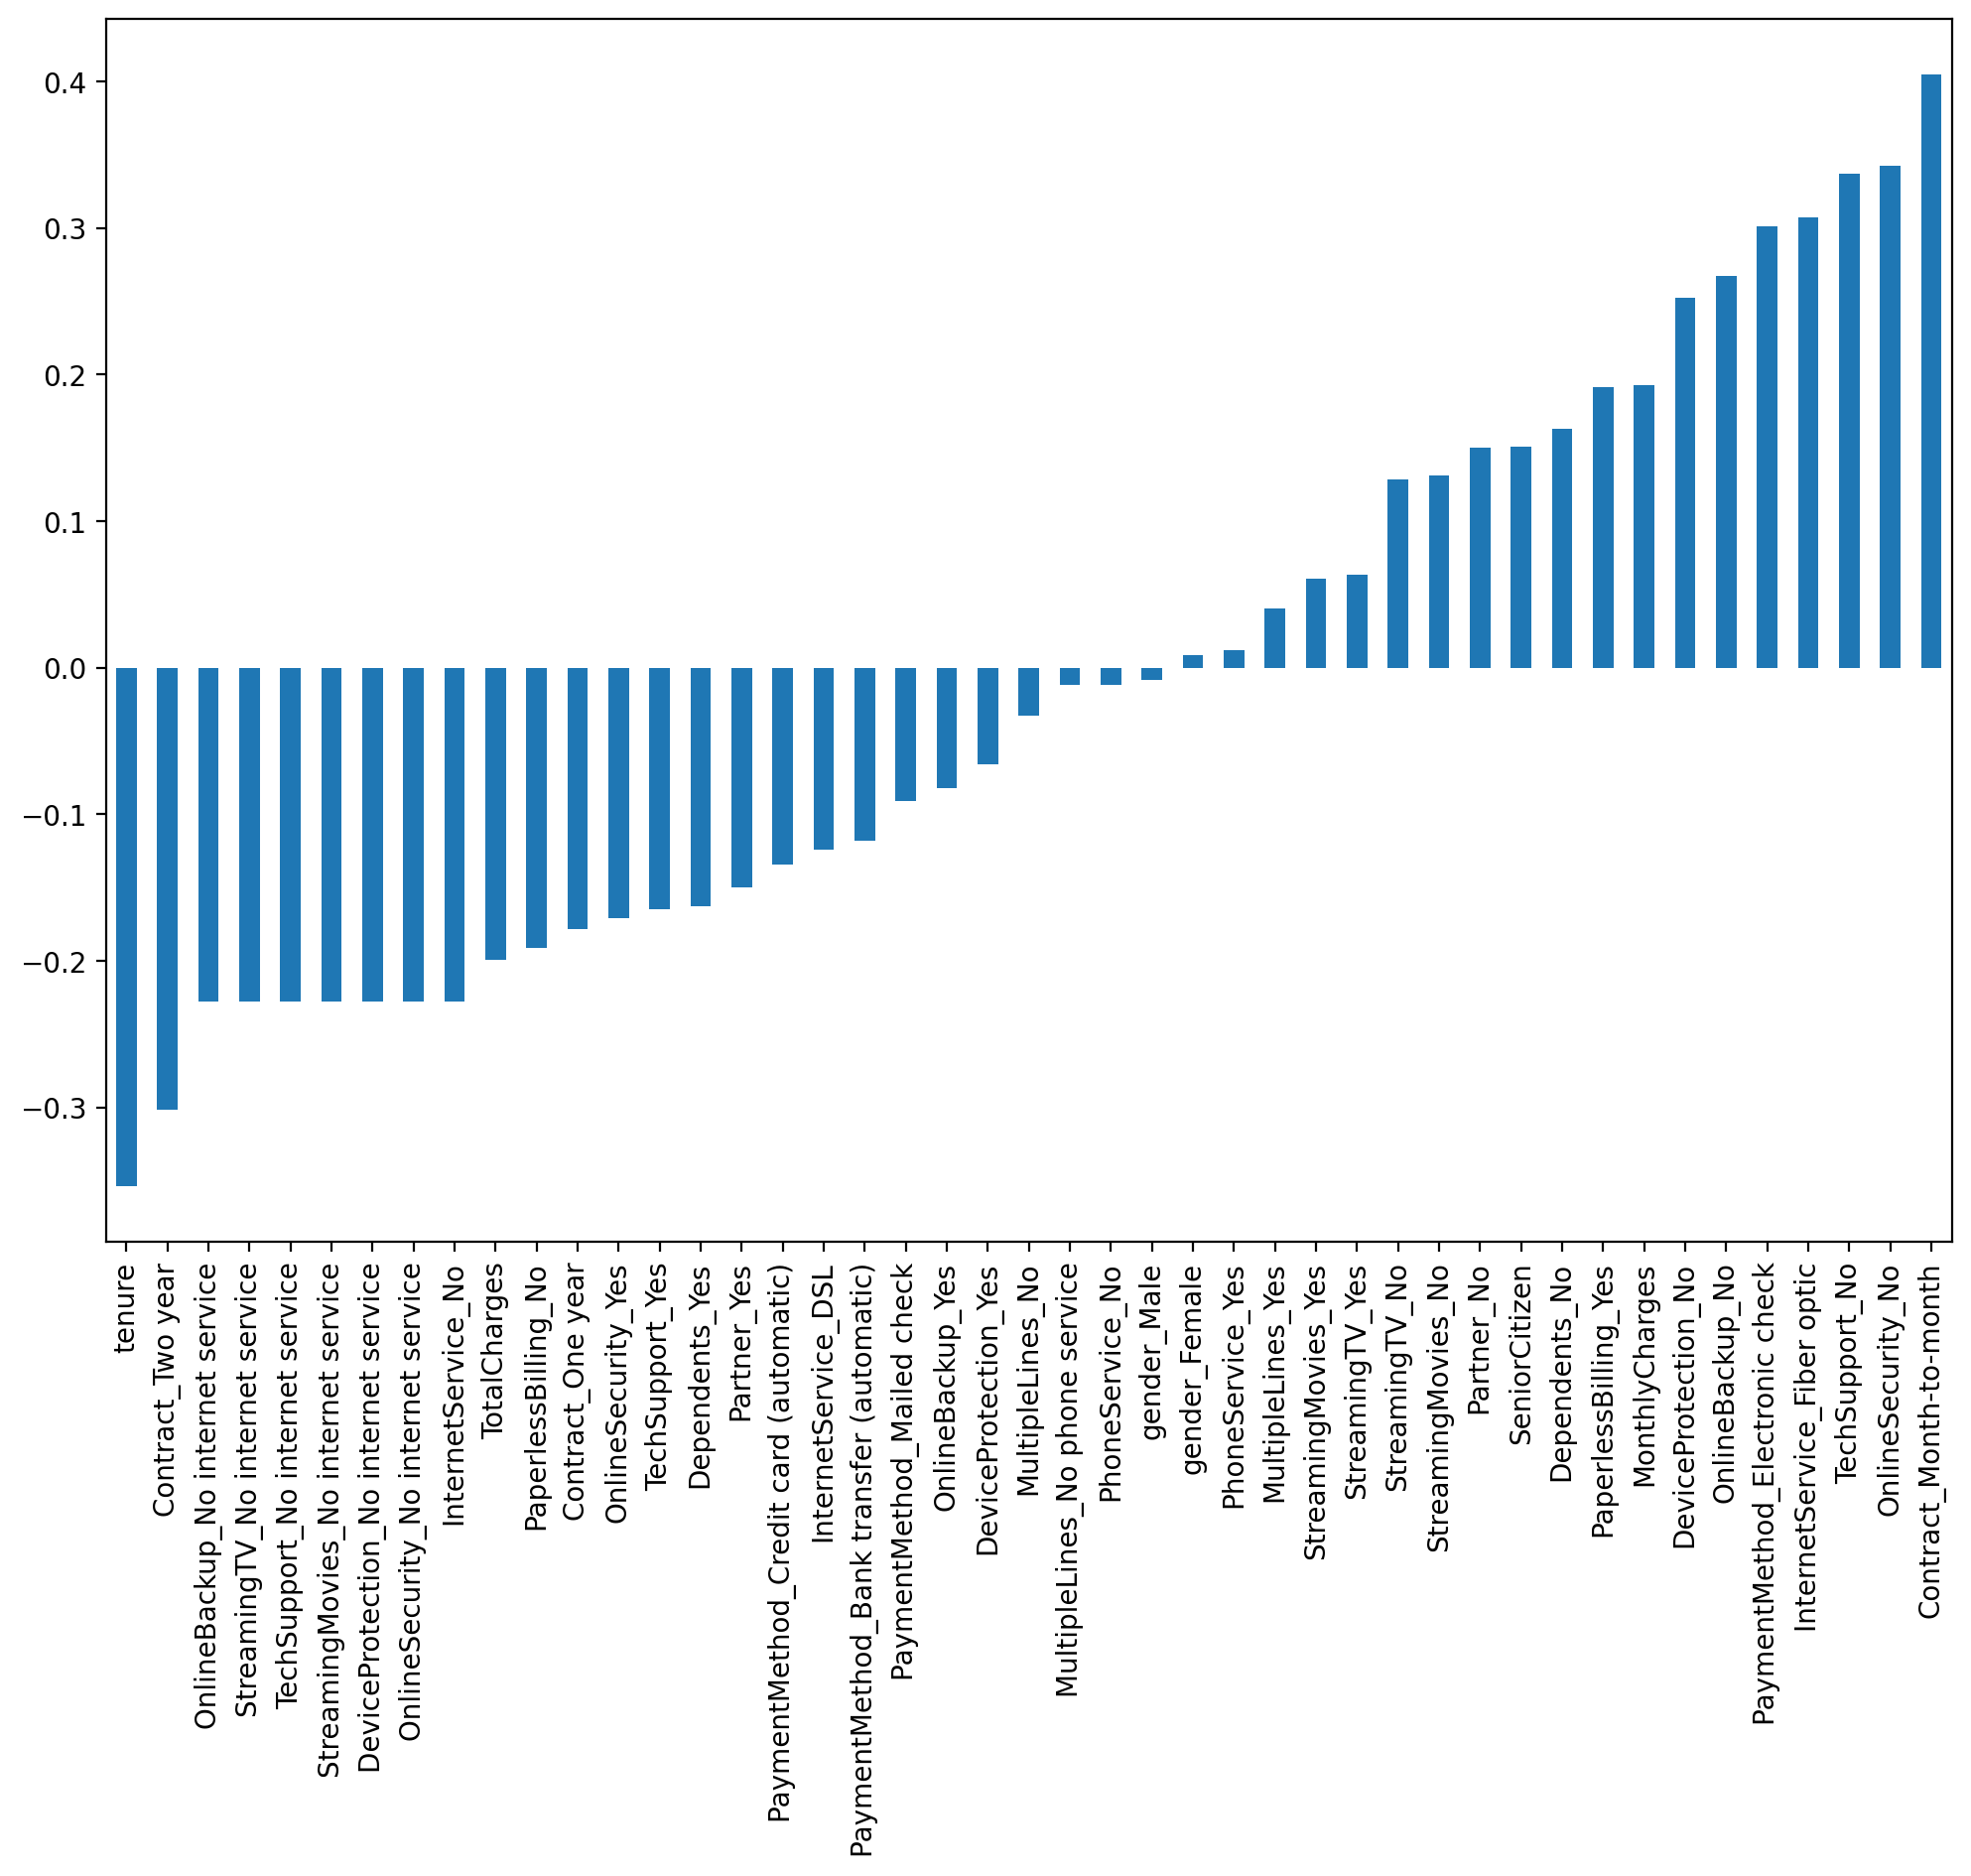

In [18]:
plt.figure(figsize=(12, 8), dpi=200)
df_corr.corr()["Churn"].sort_values()[: -1].plot(kind="bar")

In [19]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

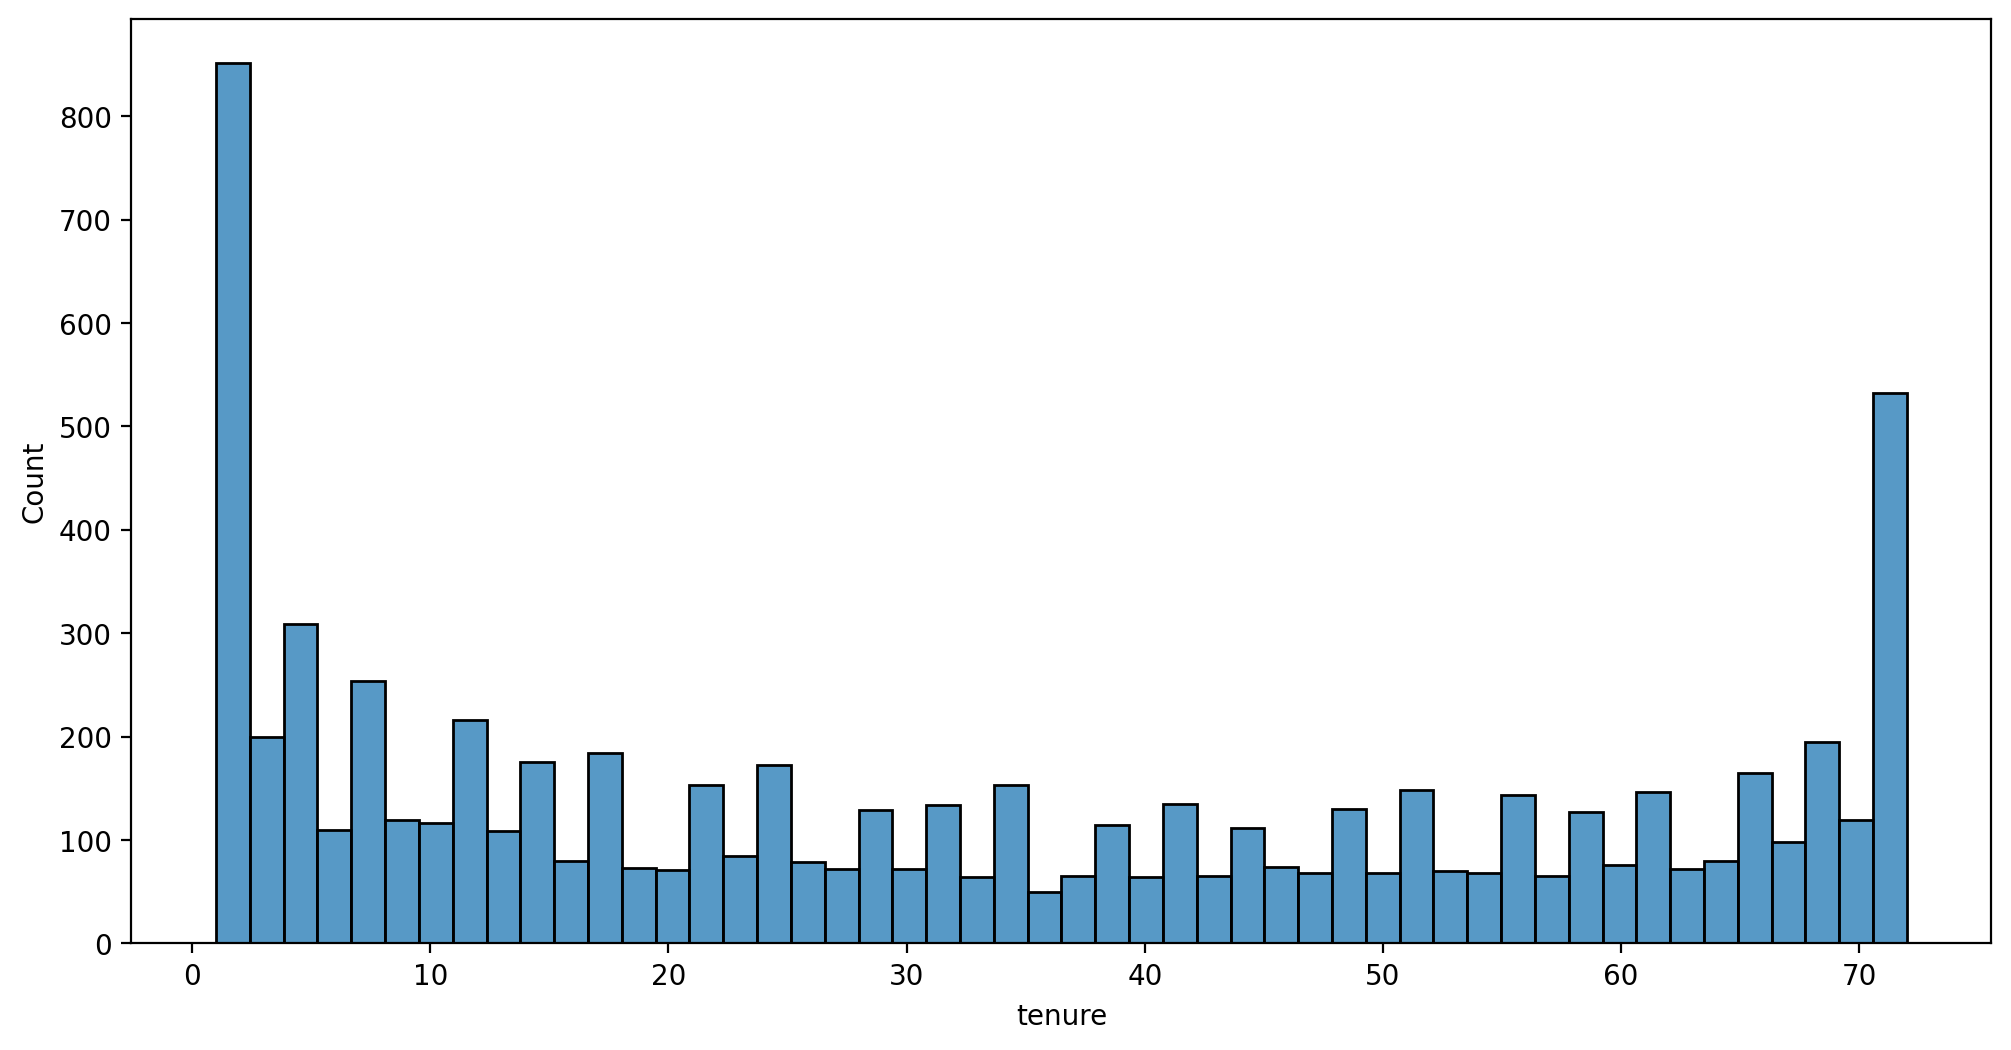

In [20]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="tenure", bins=50)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


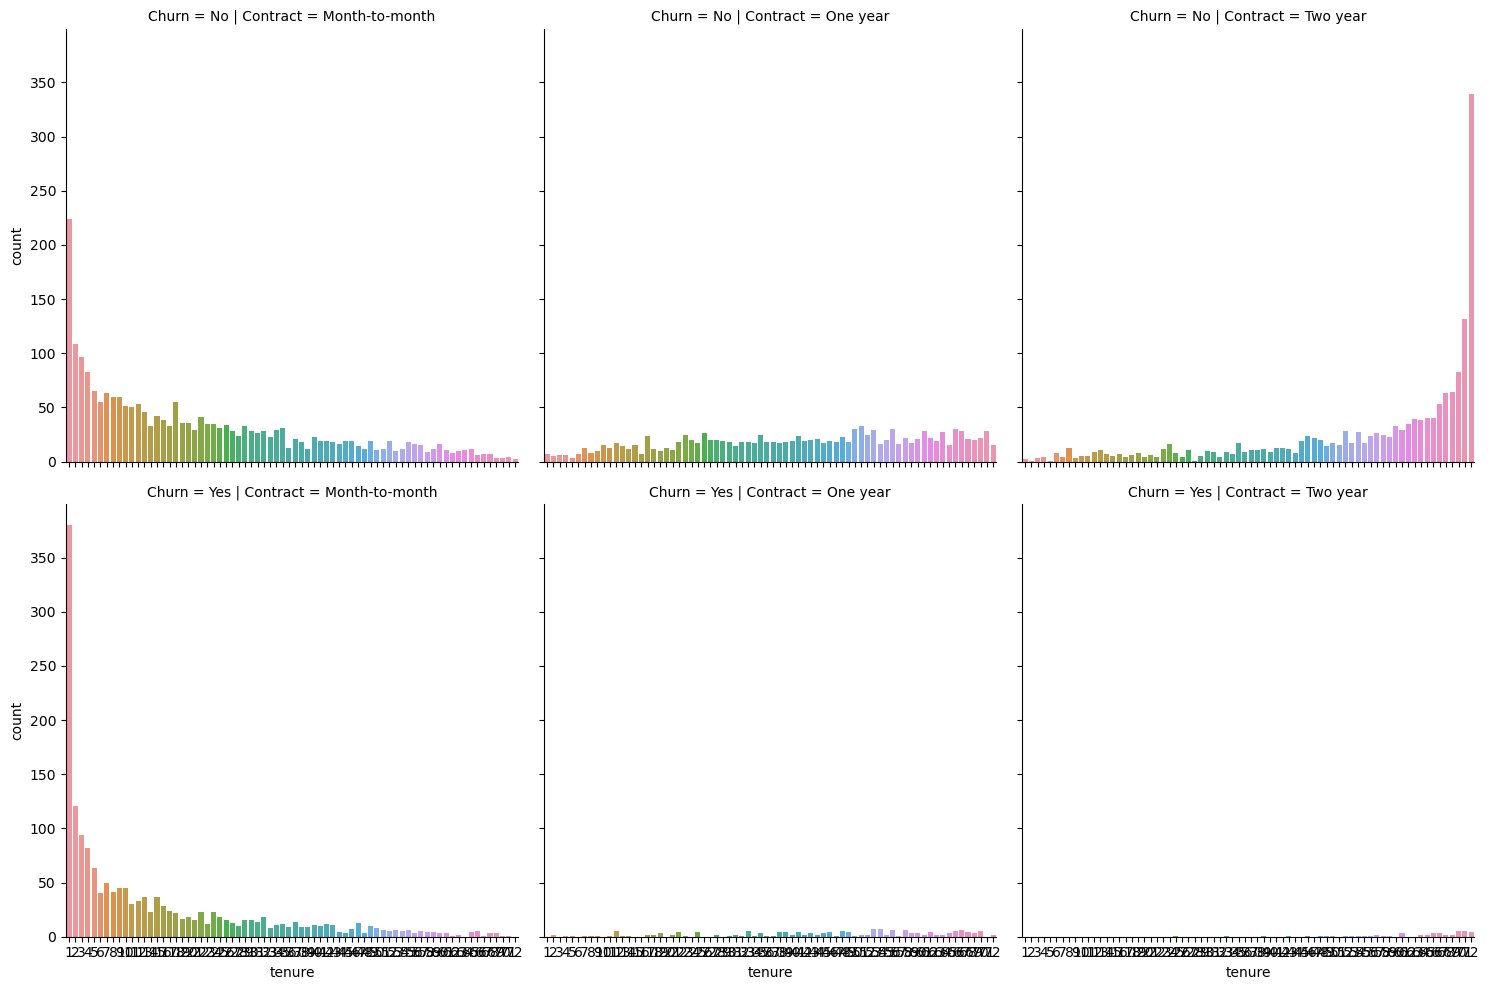

In [55]:
sns.catplot(data=df, x="tenure", row="Churn", col="Contract", kind="count")

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

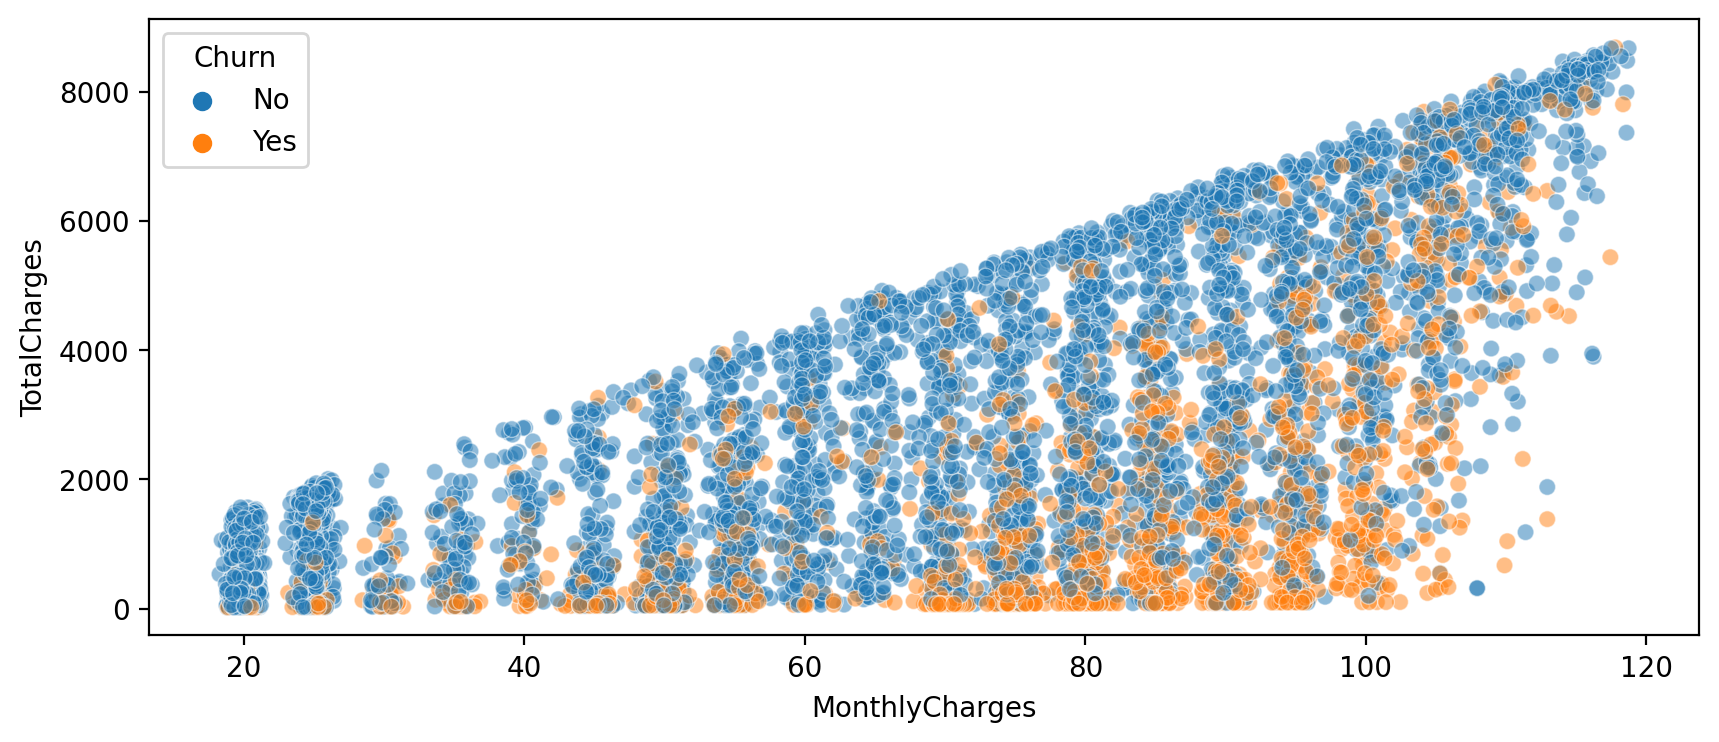

In [21]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha=0.5)

In [22]:
df.groupby("tenure")["Churn"].value_counts()

tenure  Churn
1       Yes      380
        No       233
2       Yes      123
        No       115
3       No       106
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: count, Length: 144, dtype: int64

In [23]:
len(df[(df["tenure"] == 1) & (df["Churn"] == "Yes")]) / len(df[df["tenure"]==1])

0.6199021207177814

In [24]:
rates = []
for i in range(1, 73):
    rate = len(df[(df["tenure"] == i) & (df["Churn"] == "Yes")]) / len(df[df["tenure"]==i])
    rates.append(rate)

In [25]:
rates 

[0.6199021207177814,
 0.5168067226890757,
 0.47,
 0.4715909090909091,
 0.48120300751879697,
 0.36363636363636365,
 0.3893129770992366,
 0.34146341463414637,
 0.3865546218487395,
 0.3879310344827586,
 0.31313131313131315,
 0.3247863247863248,
 0.3486238532110092,
 0.3157894736842105,
 0.37373737373737376,
 0.35,
 0.2988505747126437,
 0.24742268041237114,
 0.2602739726027397,
 0.2535211267605634,
 0.2698412698412698,
 0.3,
 0.15294117647058825,
 0.24468085106382978,
 0.2911392405063291,
 0.189873417721519,
 0.18055555555555555,
 0.21052631578947367,
 0.20833333333333334,
 0.2222222222222222,
 0.24615384615384617,
 0.2753623188405797,
 0.21875,
 0.18461538461538463,
 0.17045454545454544,
 0.2,
 0.23076923076923078,
 0.22033898305084745,
 0.25,
 0.203125,
 0.2,
 0.2153846153846154,
 0.23076923076923078,
 0.11764705882352941,
 0.09836065573770492,
 0.16216216216216217,
 0.20588235294117646,
 0.140625,
 0.22727272727272727,
 0.14705882352941177,
 0.11764705882352941,
 0.1,
 0.2,
 0.191176470

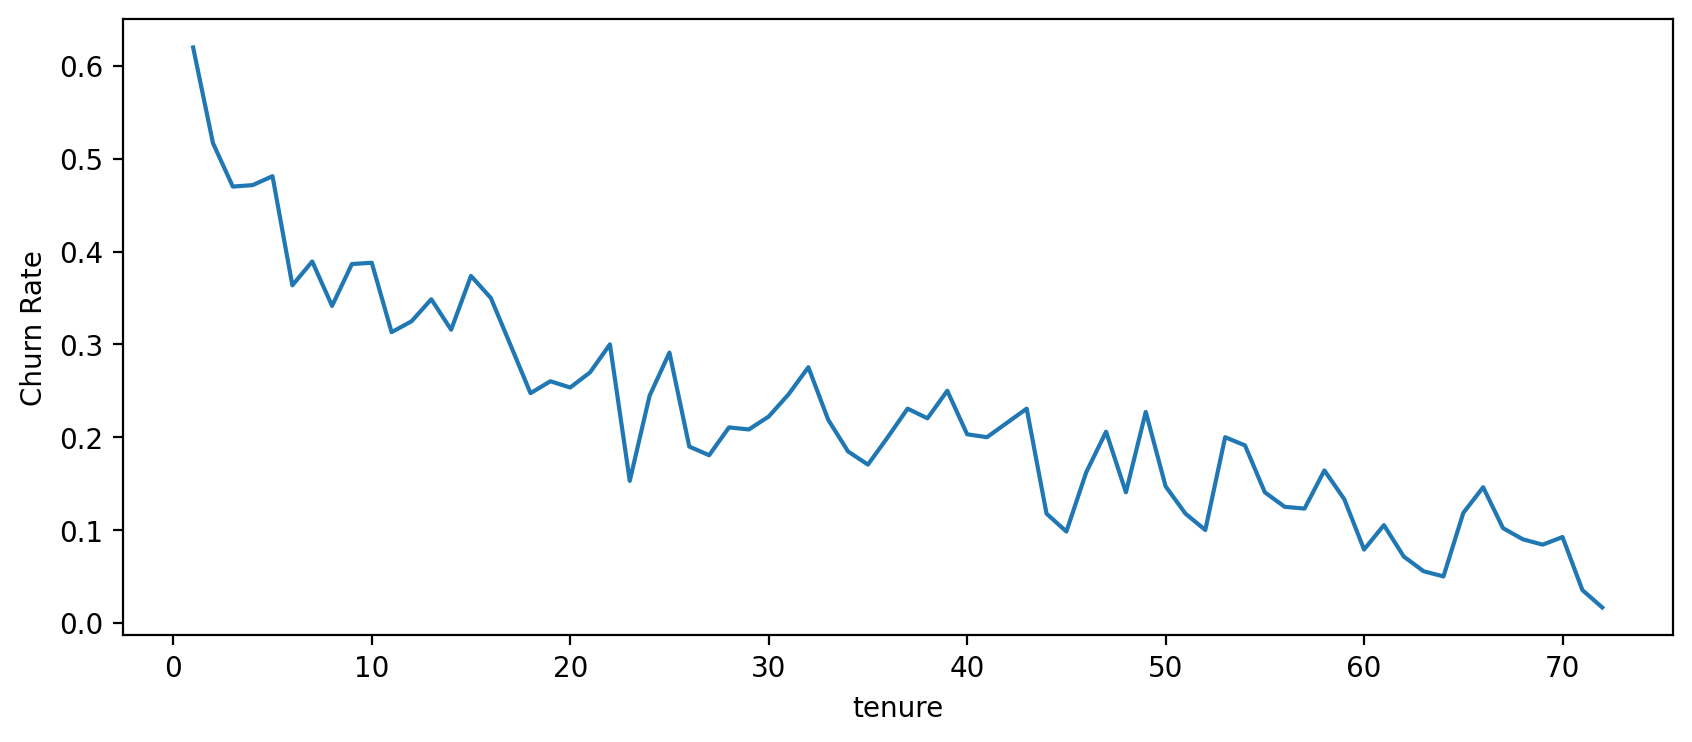

In [26]:
plt.figure(figsize=(10,4), dpi=200)
plt.plot(range(1, 73), rates)
plt.xlabel("tenure")
plt.ylabel("Churn Rate");

In [27]:
def cohort(tenure):
    if tenure < 12:
        return "0-12 Months"
    elif tenure < 24:
        return "12-24 Months"
    elif tenure < 48:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [28]:
df["Tenure Cohort"] = df["tenure"].apply(cohort)

In [29]:
cohorts = df[["tenure", "Tenure Cohort"]]

In [30]:
cohorts

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,24-48 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

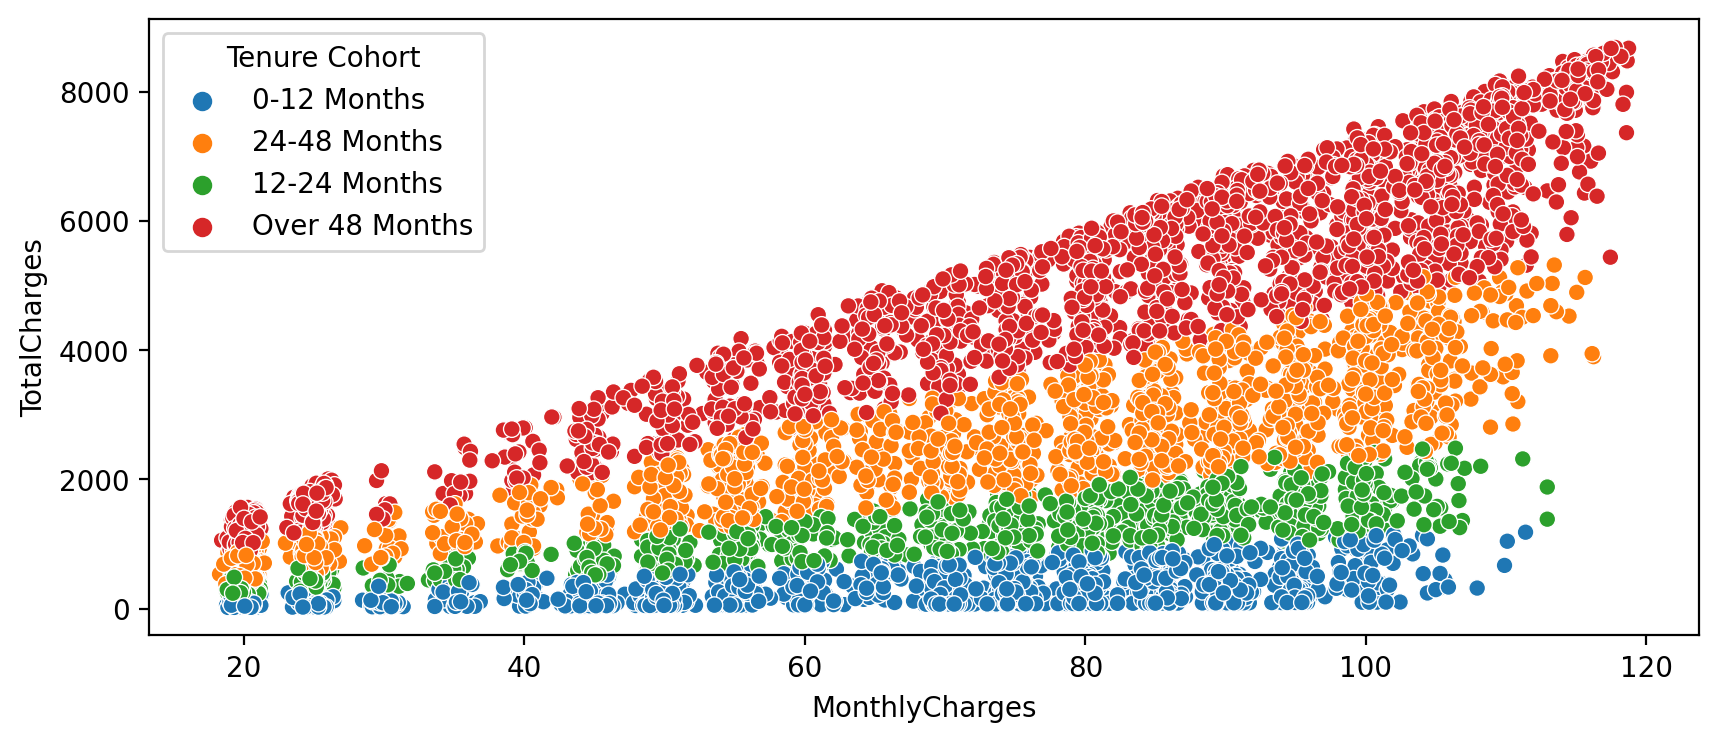

In [31]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort")

<Axes: xlabel='Tenure Cohort', ylabel='count'>

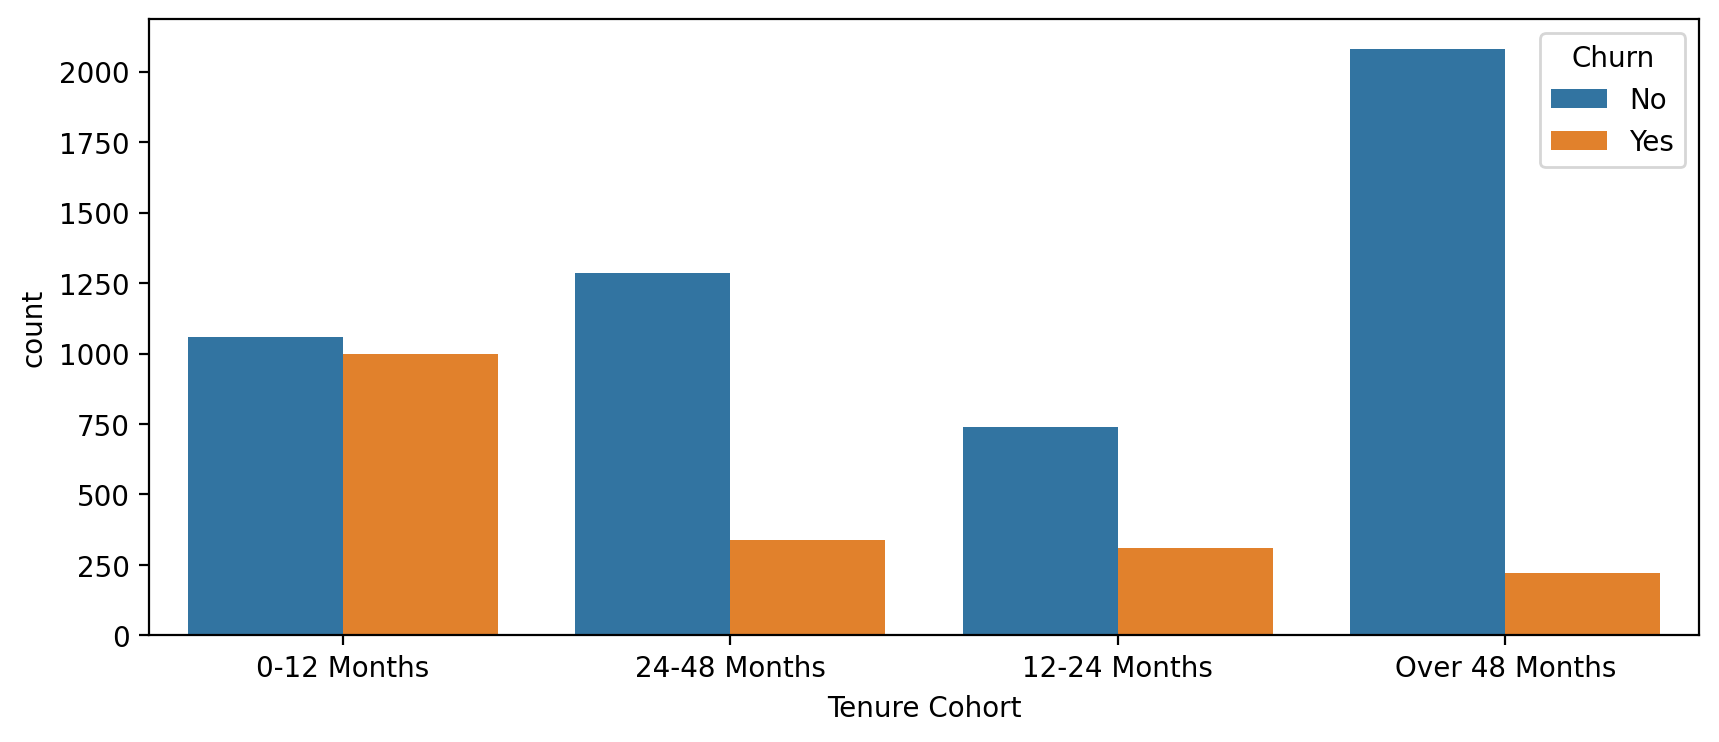

In [32]:
plt.figure(figsize=(10, 4), dpi=200)
sns.countplot(data=df, x="Tenure Cohort", hue="Churn")

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


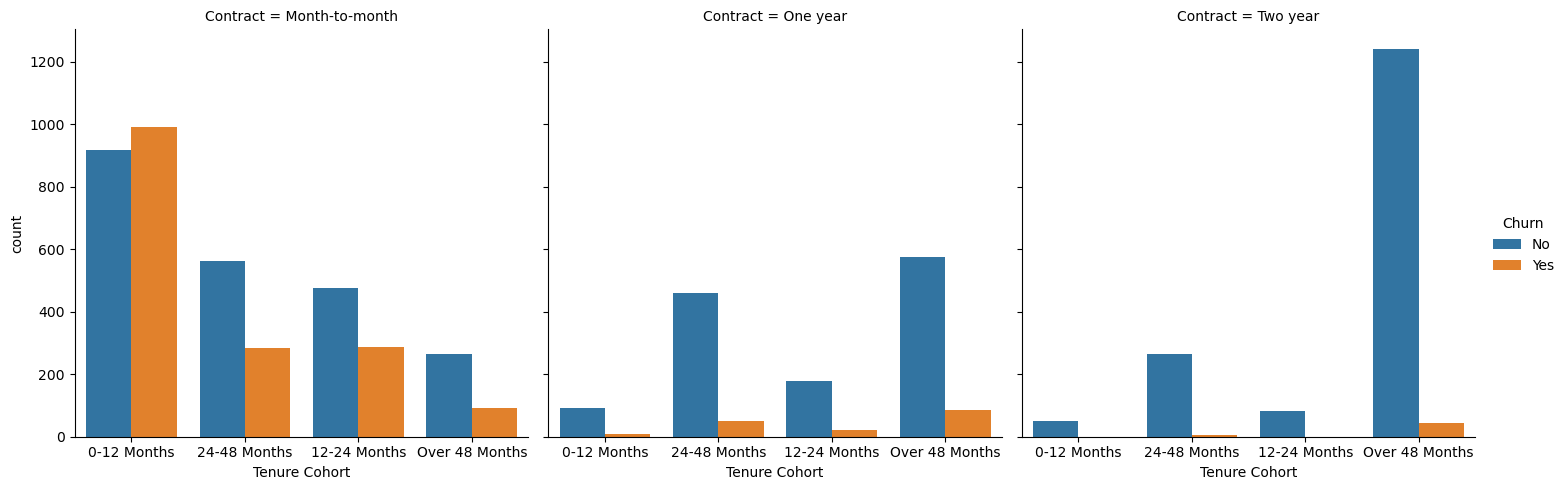

In [33]:
sns.catplot(data=df, x="Tenure Cohort", hue="Churn", col="Contract", kind="count")

In [3]:
X = pd.get_dummies(df.drop(["customerID", "Churn"], axis=1), drop_first=True)*1

In [4]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [5]:
y = df["Churn"]

In [37]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [41]:
model = DecisionTreeClassifier()

In [42]:
param_grid = {"criterion": ["gini", "entropy", "log_loss"],
             "max_depth": [4, 6, 10, 12],
             "max_features": ["auto", "sqrt", "log2"]}

In [43]:
grid_model = GridSearchCV(model, param_grid)

In [44]:
grid_model.fit(X_train, y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [45]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2'}

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

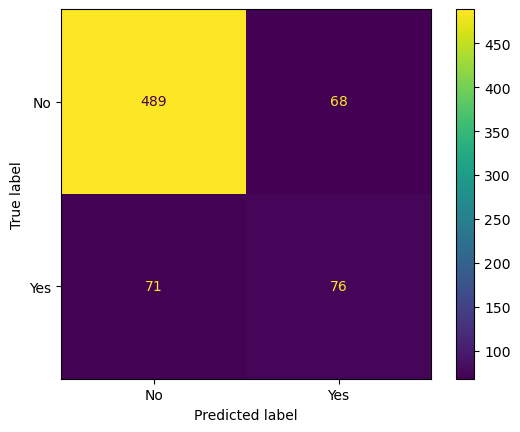

In [47]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [48]:
predictions = grid_model.predict(X_test)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.88      0.88       557
         Yes       0.53      0.52      0.52       147

    accuracy                           0.80       704
   macro avg       0.70      0.70      0.70       704
weighted avg       0.80      0.80      0.80       704



In [54]:
feat = pd.DataFrame(index=X.columns, data=grid_model.best_estimator_.feature_importances_, columns=["Importance"]).sort_values("Importance")

In [55]:
feat

,Importance
OnlineBackup_No internet service,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
MultipleLines_No phone service,0.000000
InternetService_No,0.000000
OnlineBackup_Yes,0.000051
Partner_Yes,0.000553
StreamingMovies_Yes,0.000945


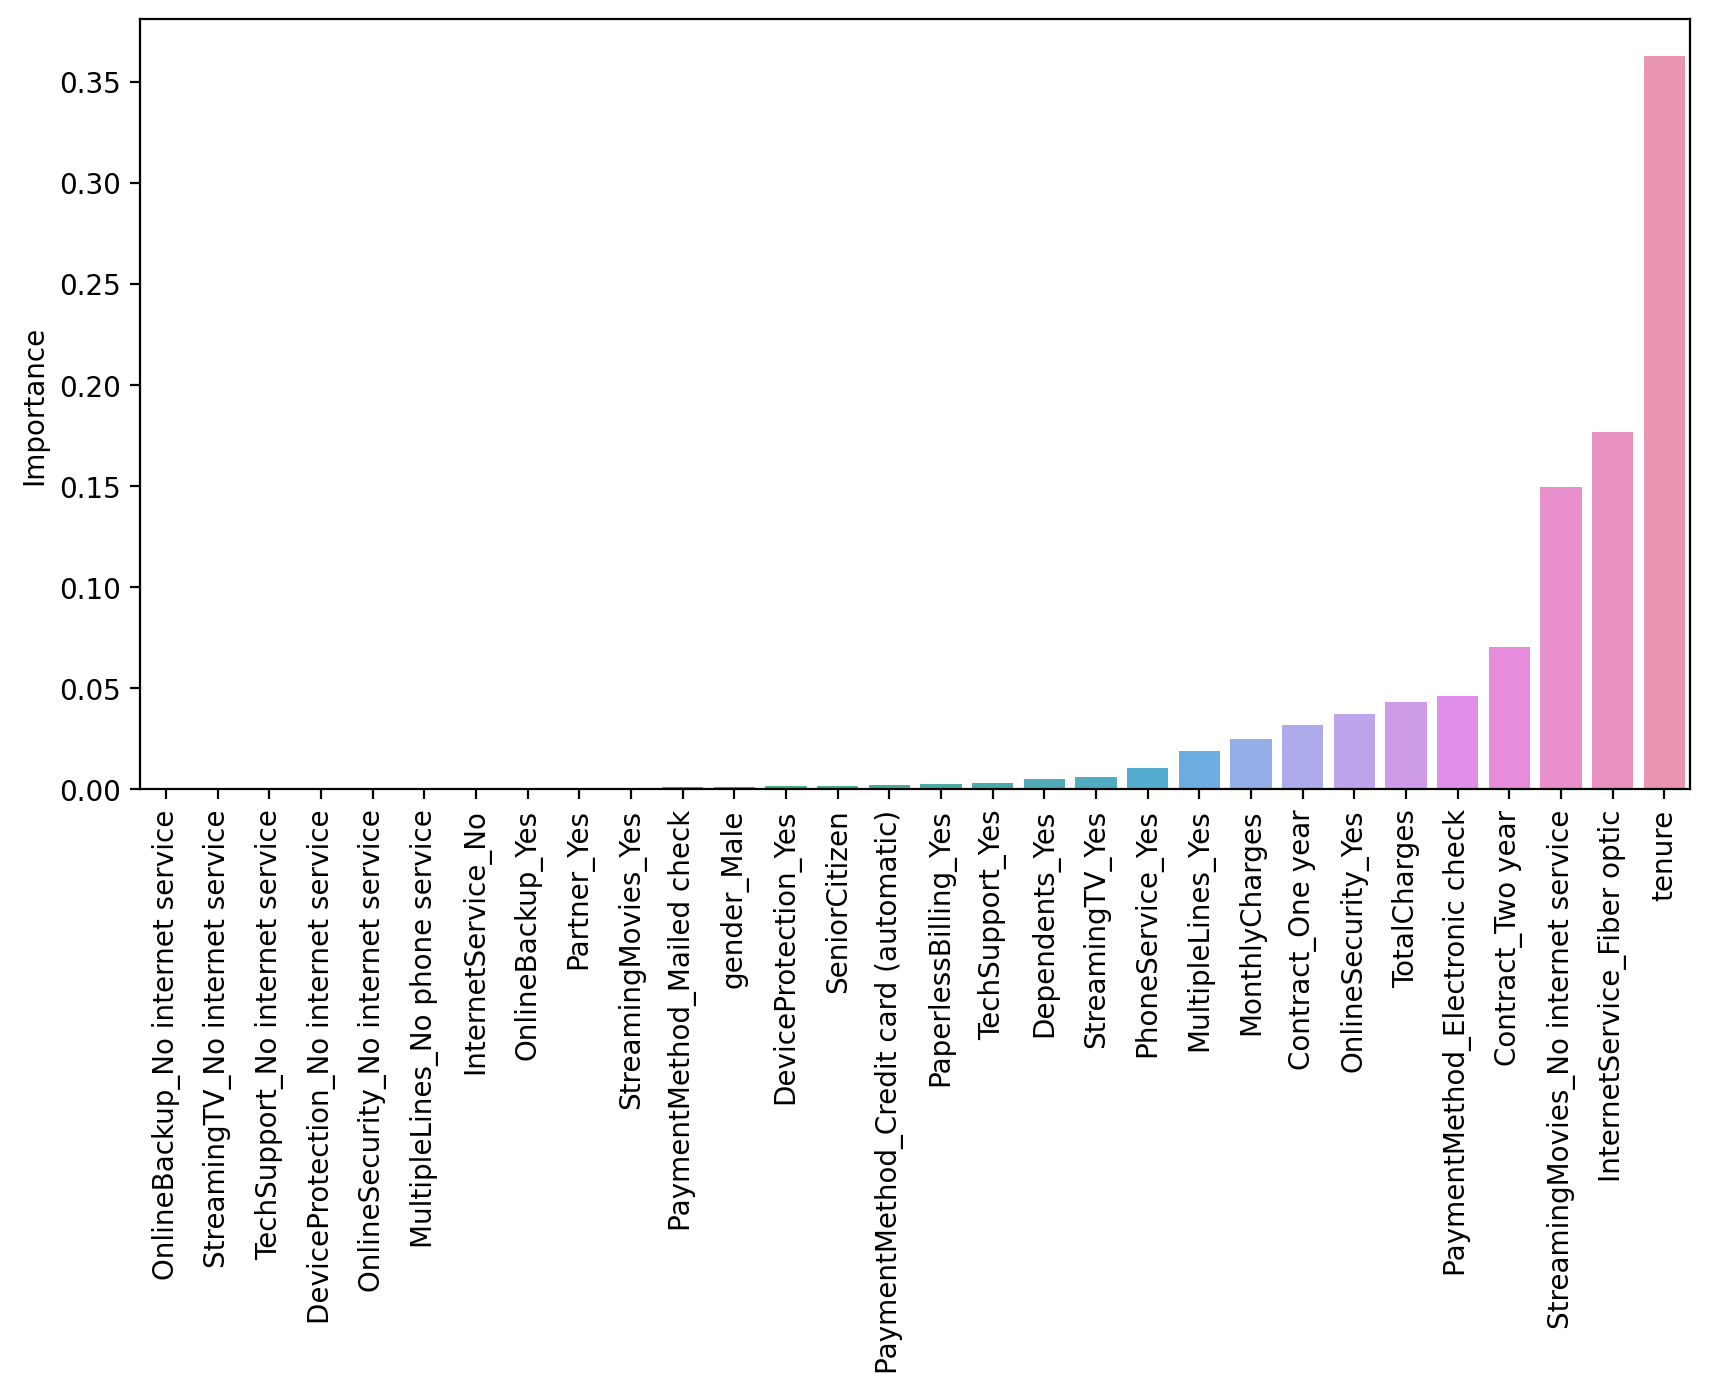

In [58]:
plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(data=feat, x=feat.index, y="Importance")
plt.xticks(rotation=90);

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier()

In [65]:
param_grid = {"n_estimators": [64, 100, 128, 150, 200],
             "criterion": ["gini", "entropy"],
             "max_depth": [3, 6, 9, 12],
             "bootstrap": [True, False],
             "oob_score": [True, False],
             "max_features": ["sqrt", "log2"]}

In [66]:
grid = GridSearchCV(rfc, param_grid)

In [67]:
grid.fit(X_train, y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError("Out of 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 150, 200],
                         'oob_score': [True, False]})

In [68]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 100,
 'oob_score': False}

In [70]:
predictions = grid.predict(X_test)

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.48      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
model = AdaBoostClassifier()

In [74]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [75]:
predictions = model.predict(X_test)

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbc = GradientBoostingClassifier()

In [79]:
param_grid = {"n_estimators": [50, 100, 128, 200],
             "learning_rate": [0.01, 0.05, 0.1, 0.2],
             "max_depth": [3, 4, 5, 6]}

In [80]:
grid_gbc = GridSearchCV(gbc, param_grid)

In [81]:
grid_gbc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 128, 200]})

In [82]:
grid_gbc.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [83]:
predictions = grid_gbc.predict(X_test)

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.49      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
svc = SVC()

In [12]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1],
             "kernel": ["linear", "poly", "rbf"],
             "degree": [2, 3, 4, 6, 10]}

In [13]:
grid_svc = GridSearchCV(svc, param_grid)

In [14]:
grid_svc.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 6, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [15]:
grid_svc.best_params_

{'C': 0.01, 'degree': 2, 'kernel': 'linear'}

In [16]:
predictions = grid_svc.predict(scaled_X_test)

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [21]:
knn = KNeighborsClassifier()

In [22]:
operations = [("scaler", scaler), ("knn", knn)]

In [23]:
pipe = Pipeline(operations)

In [24]:
k_values = list(range(1, 30))

In [25]:
param_grid = {"knn__n_neighbors": k_values}

In [29]:
knn_model = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

In [30]:
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [32]:
knn_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=29))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=29),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 29,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [34]:
mean_test_score = knn_model.cv_results_["mean_test_score"]

Text(0.5, 0, 'K')

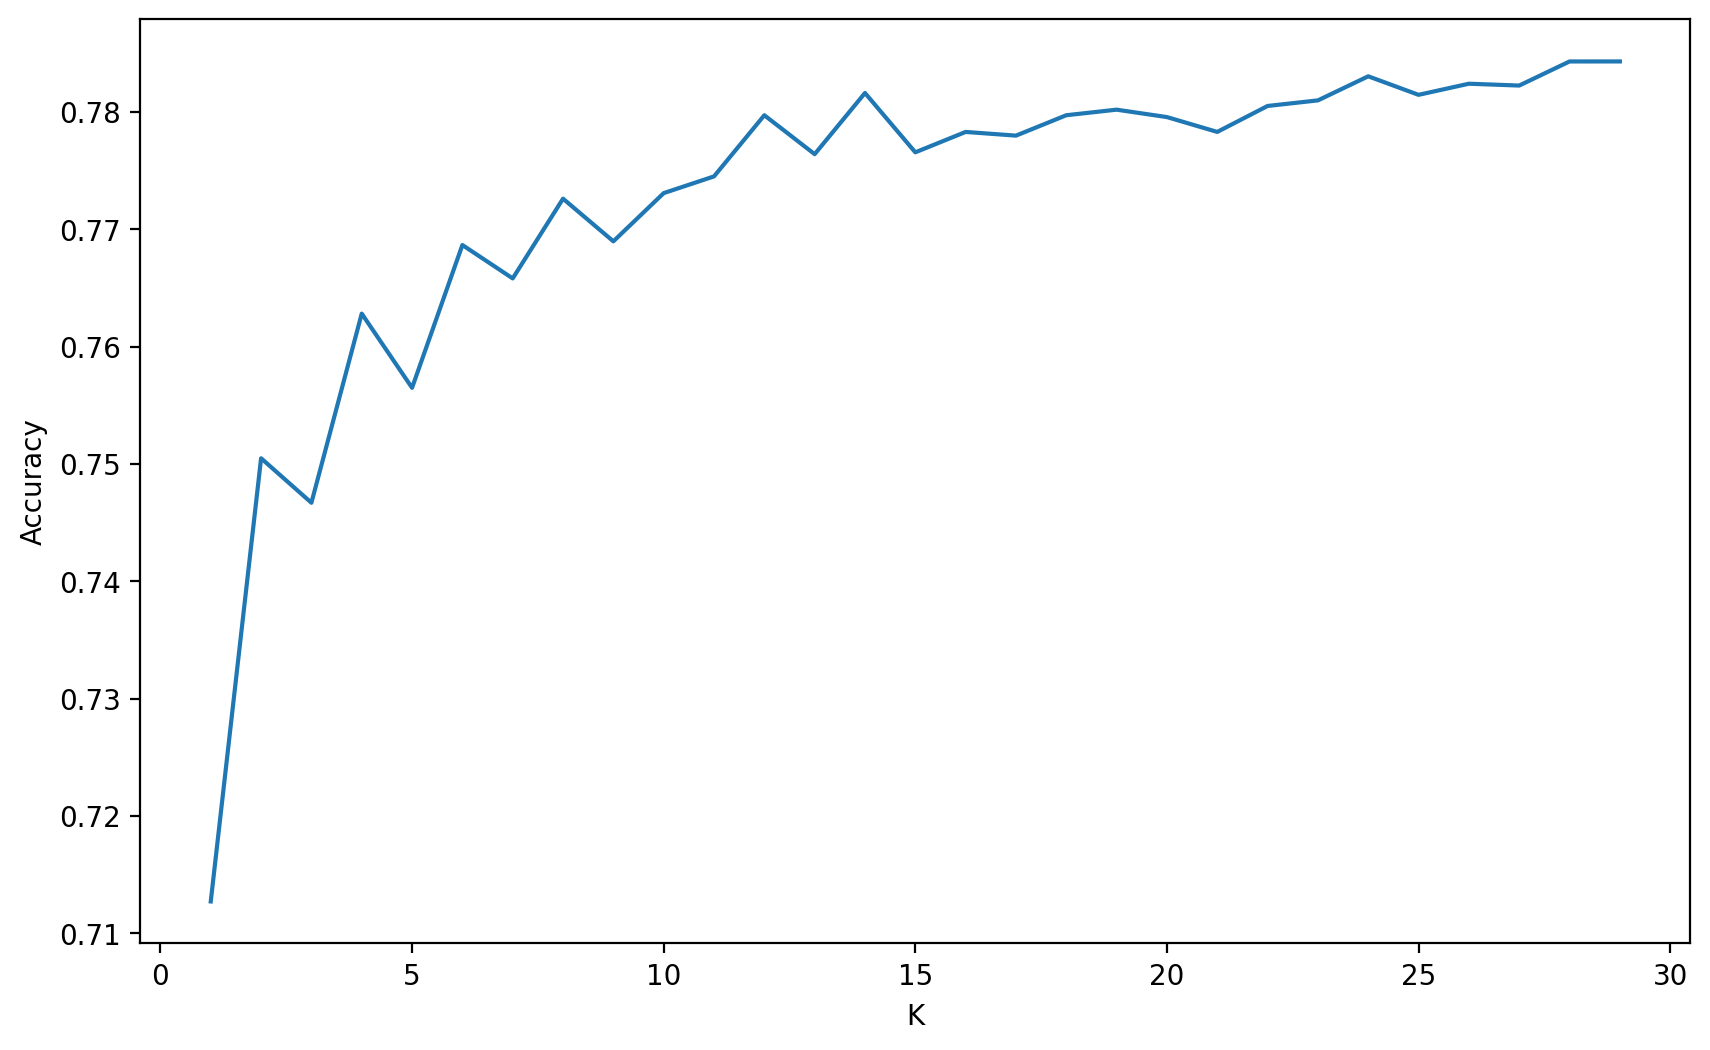

In [35]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30), mean_test_score)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [36]:
predictions = knn_model.predict(X_test)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.88      0.88      0.88       557
         Yes       0.55      0.56      0.55       147

    accuracy                           0.81       704
   macro avg       0.71      0.72      0.72       704
weighted avg       0.81      0.81      0.81       704



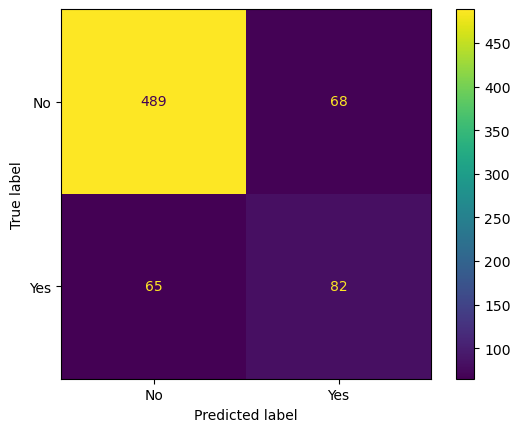

In [38]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=100000)

In [41]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 10)
C = np.logspace(0, 1, 10)

param_grid = {"penalty": penalty, "l1_ratio": l1_ratio, "C": C}

In [42]:
grid = GridSearchCV(log_model, param_grid)

In [43]:
grid.fit(scaled_X_train, y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_

GridSearchCV(estimator=LogisticRegression(max_iter=100000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [44]:
grid.best_params_

{'C': 10.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [45]:
grid.best_estimator_.coef_

array([[ 8.22446528e-02, -1.34625016e+00, -1.07547690e+00,
         6.03269960e-01,  1.21943022e-03, -1.06309830e-02,
        -4.75052697e-02,  1.63758656e-02, -1.63758656e-02,
         2.03298473e-01,  8.33069649e-01, -9.70071187e-02,
        -9.70071187e-02, -1.10173889e-01, -9.70071187e-02,
         1.34839206e-02, -9.70071187e-02,  7.16226362e-02,
        -9.70071187e-02, -8.73667721e-02, -9.70071187e-02,
         2.76639919e-01, -9.70071187e-02,  2.58391900e-01,
        -2.92283246e-01, -5.87575509e-01,  1.69203816e-01,
        -4.47729660e-02,  1.47943816e-01, -2.75841189e-02]])

In [55]:
df_coef = pd.Series(index=X.columns, data=grid.best_estimator_.coef_[0])

In [56]:
df_coef

SeniorCitizen                            0.082245
tenure                                  -1.346250
MonthlyCharges                          -1.075477
TotalCharges                             0.603270
gender_Male                              0.001219
Partner_Yes                             -0.010631
Dependents_Yes                          -0.047505
PhoneService_Yes                         0.016376
MultipleLines_No phone service          -0.016376
MultipleLines_Yes                        0.203298
InternetService_Fiber optic              0.833070
InternetService_No                      -0.097007
OnlineSecurity_No internet service      -0.097007
OnlineSecurity_Yes                      -0.110174
OnlineBackup_No internet service        -0.097007
OnlineBackup_Yes                         0.013484
DeviceProtection_No internet service    -0.097007
DeviceProtection_Yes                     0.071623
TechSupport_No internet service         -0.097007
TechSupport_Yes                         -0.087367


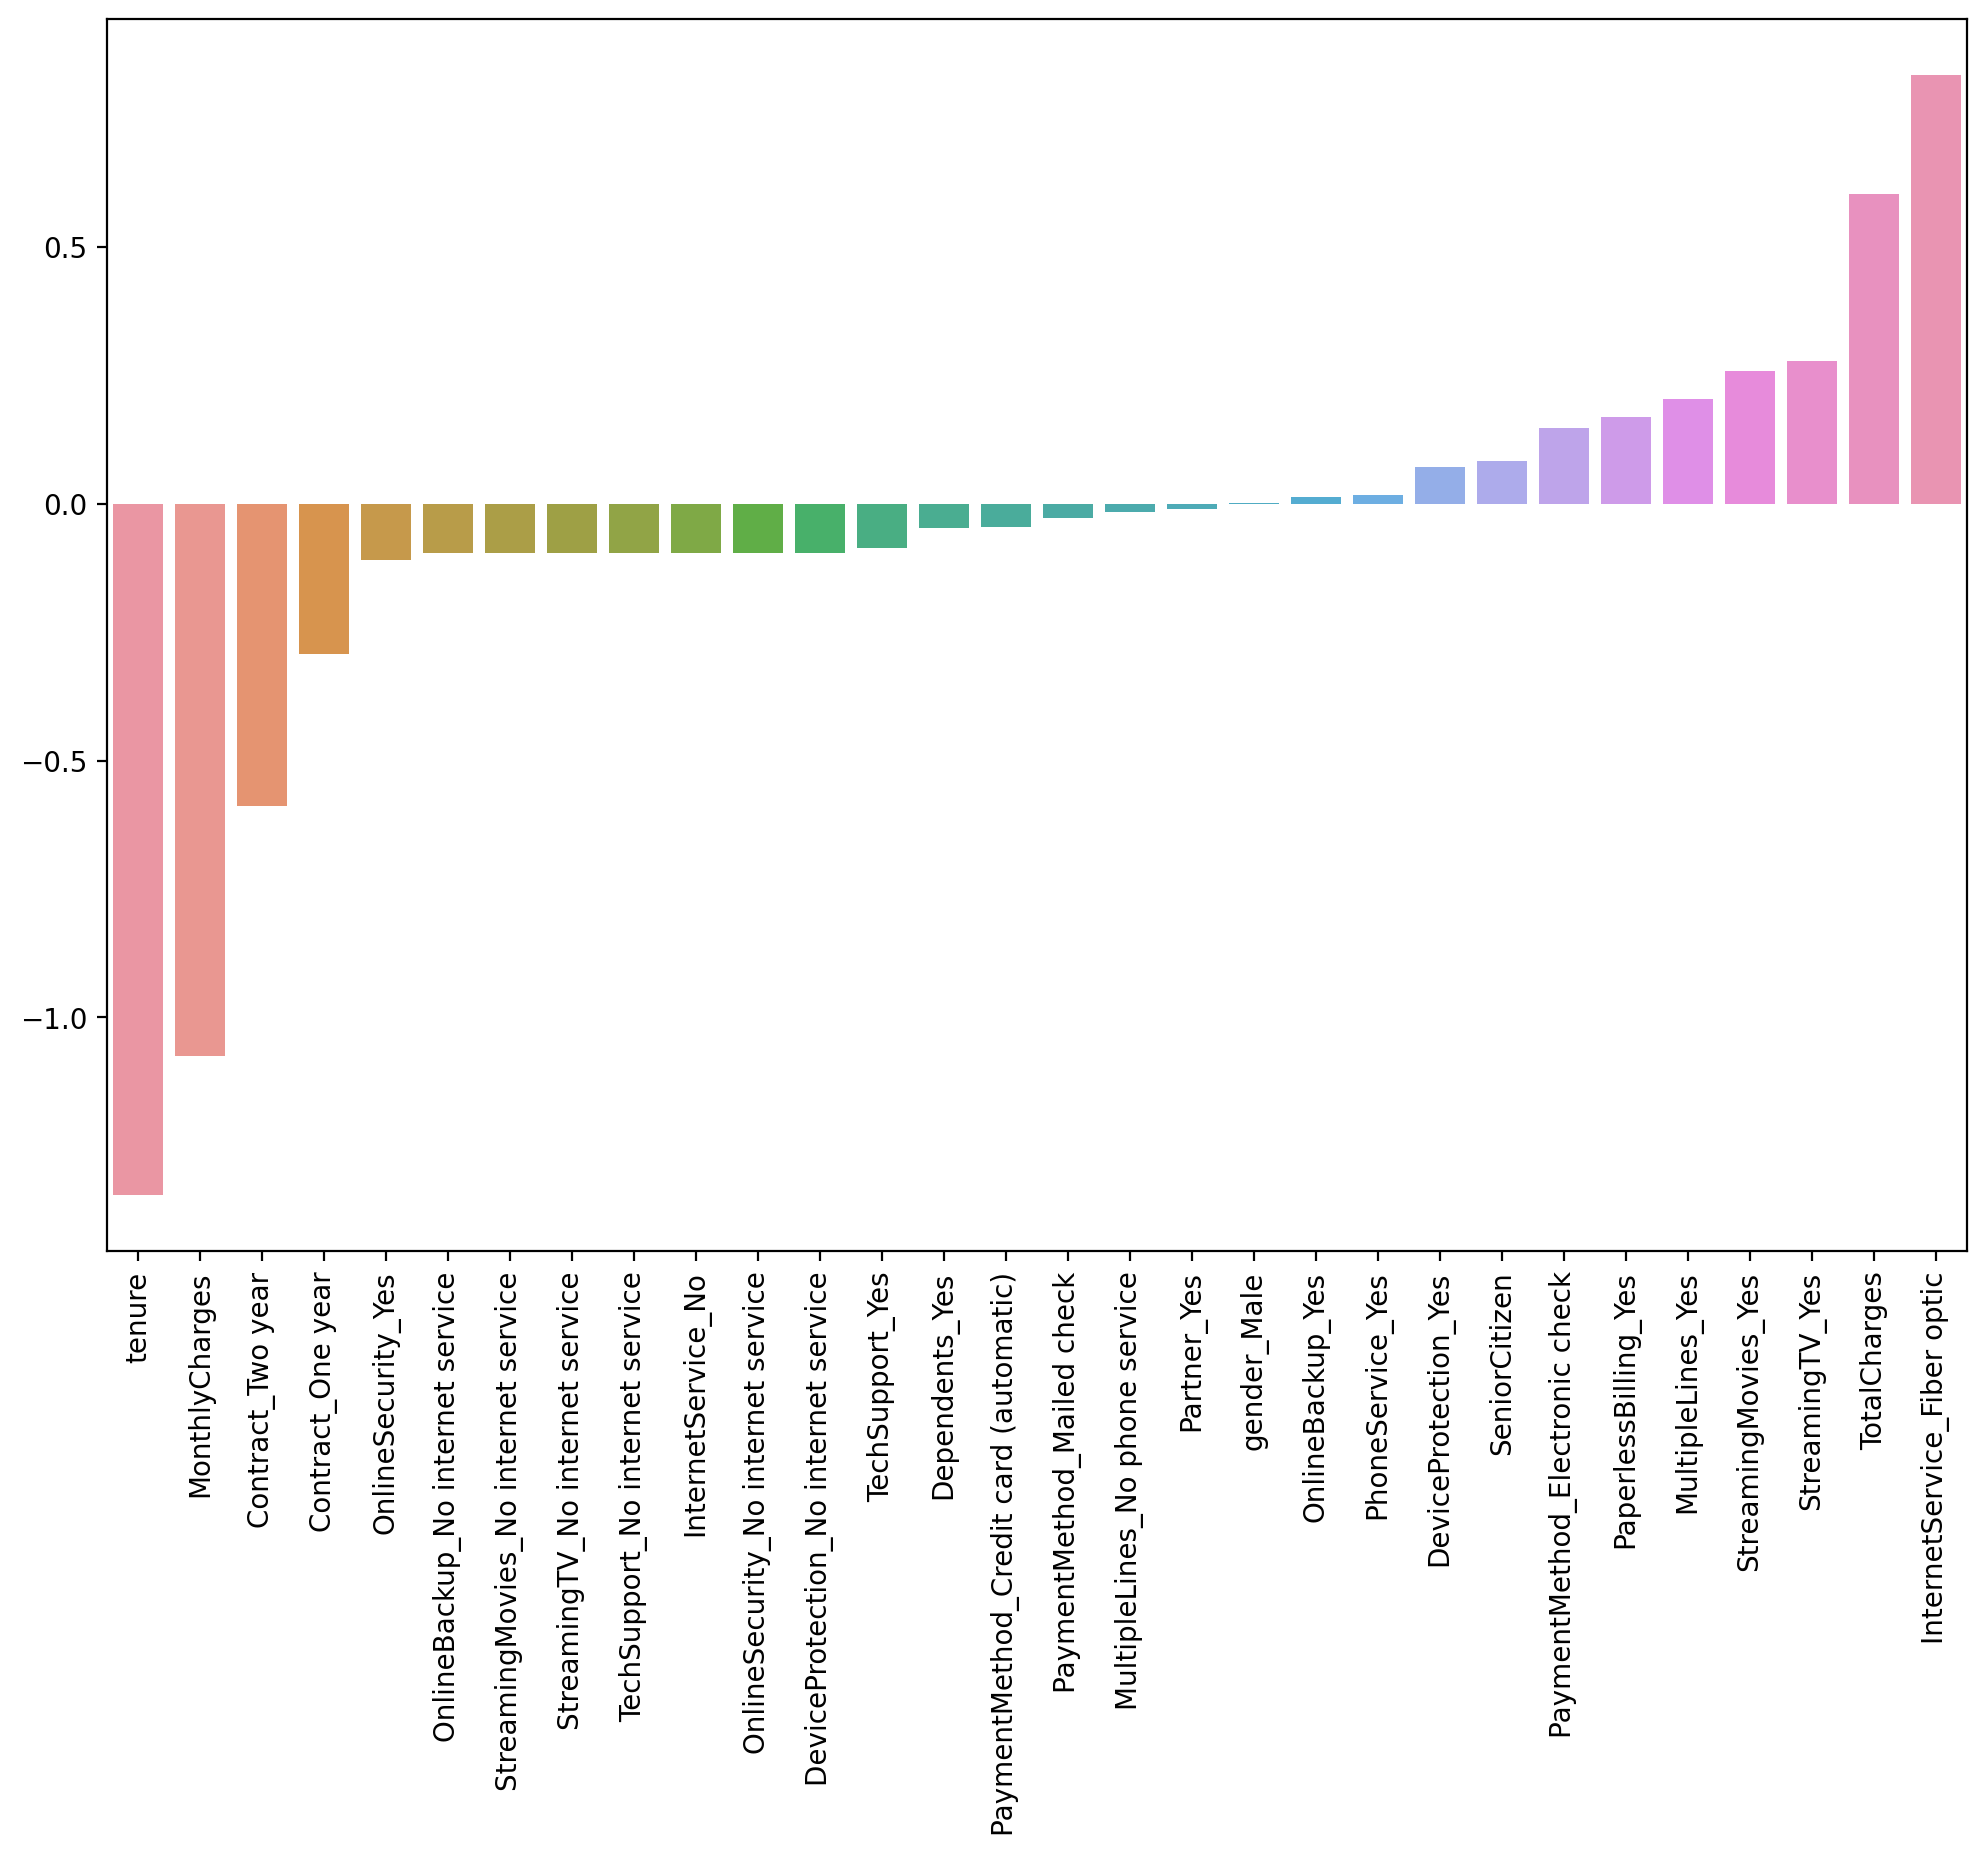

In [58]:
df_coef = df_coef.sort_values()
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x=df_coef.index, y=df_coef.values)
plt.xticks(rotation=90);

In [59]:
predictions = grid.predict(scaled_X_test)

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.55      0.58       147

    accuracy                           0.83       704
   macro avg       0.74      0.73      0.74       704
weighted avg       0.83      0.83      0.83       704

